# Final Tutorial: Visualizing the Relationship Between Economic Disadvantage and Proficiency in Mathematics

**Adhithya Kannan & Kenton Wong**  
**CMSC320 Fall 2019 with John Dickerson**

## Introduction

In this day and age, standardized testing is a normal part of a student's life in secondary and even primary education. It is a way to not only each student's score relative to everyone else's in the state or even country but also to show the effectiveness of teachers and schools. This is executed by means of an objective measure based on the material of the questions and the delivery of the test. With the data collected from standardized tests, we can see statistics about proficiency, outliars, and other significant observations on a tested subject in a certain school or area.

While we are able to get our hands on data, it does not immediately tell us everything we need to know. We can determine minimums/maximums and mean scores and base these based on location, gender, race, etc.  
In this project, we will be analyzing proficiency of students in grades 3 through 12 by race, specifically in Maryland and Alaska, in mathematics based on standardized testing data and percentage of economically disadvantaged students in each recorded area. We will first confirm a relationship between percentage of economically disadvantaged students and percent of proficient students based on every valid data entry. Then, we will divide the data into four sections based on ethnicity of the students (white, black, Asian, and Hispanic) and determine the same relationships for each of these sections. Lastly, we will look into specifically Maryland and Alaska and compare data from these states with both each other and the relationships that we will find from the whole dataset.

This tutorial aims to further explain results of standardized tests with respect to economic disadvantage. It will produce and analyze results of proficiency rates for different ethnicities and example states and explore what other information that the data can lead us to. This is important because of the large gap between academic proficiency and achievement between wealthier students and poorer students found in previous research listed in the *Additional Resources* section at the bottom as well as the large difference in wealth between races in general. This is important in the field of data science because it shows just how much information you can get from data, and it also offers visual representations and techniques that may be used in further research to possibly help propose ideas that may assist economically disadvantaged students with their academic proficiency.

In [439]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# lets us see enough columns
pd.set_option('display.max_columns', 40)

## Retrieving Data

We pulled data from the US Department of Education's [dataset](https://www2.ed.gov/about/inits/ed/edfacts/data-files/index.html) for Achievement Results for State Assessments in Mathematics for the 2016-2017 school year.

This data was given in a csv file with 16438 rows and 230 columns. Each row represents a data entry for a specific region (school, city, district, county, etc.) of students and each column represents categories of information, such as state, number of students who completed the standardized test, percentage of these students who are considered "proficient," and several columns that give information of different categories of the students in each row. These categories include races, genders, disability, etc. We cut out the columns after the first 34 because those are grade-specific results; our project only relies on the overall results regardless of grade. All rows were used for at least a part of the project.

In [440]:
df_raw = pd.read_csv("data.csv", low_memory=False) # we keep getting a warning without setting low_memory to False, so...

df_raw = df_raw[df_raw.columns[0:34]] # only use first 34 columns

df_raw.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,DATE_CUR,ALL_MTH00NUMVALID_1617,ALL_MTH00PCTPROF_1617,MAM_MTH00NUMVALID_1617,MAM_MTH00PCTPROF_1617,MAS_MTH00NUMVALID_1617,MAS_MTH00PCTPROF_1617,MBL_MTH00NUMVALID_1617,MBL_MTH00PCTPROF_1617,MHI_MTH00NUMVALID_1617,MHI_MTH00PCTPROF_1617,MTR_MTH00NUMVALID_1617,MTR_MTH00PCTPROF_1617,MWH_MTH00NUMVALID_1617,MWH_MTH00PCTPROF_1617,F_MTH00NUMVALID_1617,F_MTH00PCTPROF_1617,M_MTH00NUMVALID_1617,M_MTH00PCTPROF_1617,CWD_MTH00NUMVALID_1617,CWD_MTH00PCTPROF_1617,ECD_MTH00NUMVALID_1617,ECD_MTH00PCTPROF_1617,LEP_MTH00NUMVALID_1617,LEP_MTH00PCTPROF_1617,HOM_MTH00NUMVALID_1617,HOM_MTH00PCTPROF_1617,MIG_MTH00NUMVALID_1617,MIG_MTH00PCTPROF_1617
0,ALABAMA,1,100005,AL-101,Albertville City,12-Apr-18,2837,35,3,PS,17,40-59,92,15-19,1348,27,70,30-34,1307,45,1418,34,1419,36,178,20-24,2837,35,367,10,27,LE20,160,15-19
1,ALABAMA,1,100006,AL-048,Marshall County,12-Apr-18,2979,42,11,LT50,7,GE50,31,19-Nov,692,37,33,40-49,2205,43,1410,42,1569,41,459,12,2293,38,120,15-19,132,30-34,39,30-39
2,ALABAMA,1,100007,AL-158,Hoover City,12-Apr-18,7465,67,8,GE50,516,82,1852,45,579,50,293,60-64,4217,78,3590,68,3875,66,746,26,1964,44,249,20-24,28,21-39,NaN,NaN
3,ALABAMA,1,100008,AL-169,Madison City,12-Apr-18,5599,74,34,70-79,516,89,1147,52,295,60-64,224,75-79,3383,79,2699,75,2900,72,595,44,1218,52,112,30-34,39,60-69,NaN,NaN
4,ALABAMA,1,100011,AL-167,Leeds City,12-Apr-18,1003,37,3,PS,13,LT50,223,20-24,134,20-24,24,21-39,606,46,493,39,510,35,162,14-Oct,557,29,41,LE10,52,30-39,NaN,NaN


The data was found from all aggregated standarized testing math course data, not each individual grade. ```MTH00``` is the equivalent expresssion in each column. ``` NUMVALID ``` means the number of students who completed the state assessment (check explanation for all of these terms as well). ``` PCTPROF ``` is the percentage of students scoring ```>=``` state proficiency levels on assessment. 

## Tidying Data

As you can see, there are a few challenges that we would face with this data as it is right now.

Just from the first and last few rows, you can see that there are several ```NaN```s and values with letters in them. If we want to perform numberical operations on these values, we must ensure that they are all valid numbers.

To start, we noticed that the only values that had only strings (no numbers) were either ```NaN``` or ```PS```. We replace these with ```np.nan``` as invalid values.

The values with letters *and* numbers were representing comparison operators, where ```GT``` meant ```>```, ```LT``` meant ```<```, ```GE``` meant ```>=```, and ```LE``` meant ```<=```. With these, we drop the letter part of the value and keep the number.

The trickiest part is the number ranges. Not only do we have to fix data to be one number rather than a range of numbers, we also have to re-parse the values that have, for some reason, automatically been parsed to dates. Luckily, the only number ranges that had this problem were ```6-9```, ```10-14```, and ```11-19```. For each number range, we decided to take the maximum number in the range to overestimate the values.

We make sure every value is either a valid value or an ``` np.nan ```. Any of the following columns in subset must have values otherwise it is not a valid row. There must be a total number of students overall, a state, a fipst (state number), a leaid, a st_leaid, a valid date. 

In [441]:
df = df_raw.copy()

# reformat state_id
arr = df.apply(lambda e : (e.STNAM + e.ST_LEAID[2:]), axis=1)
df = df.assign(state_id=arr)
df = df.replace('NaN', np.nan)
df = df.replace('PS', np.nan)

# we take the maximum value in these ranges since they are misrepresented dates
df = df.replace({'LE': '', 'GE': '', 'GT': '', 'LT': '', '\.': 0, 'n/a': 0,
                r'14-Oct':'14', r'9-Jun': '9', r'19-Nov': '9', '\d+\-': ''}, regex=True)
        
df.head()

,STNAM,FIPST,LEAID,ST_LEAID,LEANM,DATE_CUR,ALL_MTH00NUMVALID_1617,ALL_MTH00PCTPROF_1617,MAM_MTH00NUMVALID_1617,MAM_MTH00PCTPROF_1617,MAS_MTH00NUMVALID_1617,MAS_MTH00PCTPROF_1617,MBL_MTH00NUMVALID_1617,MBL_MTH00PCTPROF_1617,MHI_MTH00NUMVALID_1617,MHI_MTH00PCTPROF_1617,MTR_MTH00NUMVALID_1617,MTR_MTH00PCTPROF_1617,MWH_MTH00NUMVALID_1617,MWH_MTH00PCTPROF_1617,F_MTH00NUMVALID_1617,F_MTH00PCTPROF_1617,M_MTH00NUMVALID_1617,M_MTH00PCTPROF_1617,CWD_MTH00NUMVALID_1617,CWD_MTH00PCTPROF_1617,ECD_MTH00NUMVALID_1617,ECD_MTH00PCTPROF_1617,LEP_MTH00NUMVALID_1617,LEP_MTH00PCTPROF_1617,HOM_MTH00NUMVALID_1617,HOM_MTH00PCTPROF_1617,MIG_MTH00NUMVALID_1617,MIG_MTH00PCTPROF_1617,state_id
0,ALABAMA,1,100005,AL-101,Albertville City,Apr-18,2837,35,3,NaN,17,59,92,19,1348,27,70,34,1307,45,1418,34,1419,36,178,24,2837,35,367,10,27,20,160,19,ALABAMA-101
1,ALABAMA,1,100006,AL-048,Marshall County,Apr-18,2979,42,11,50,7,50,31,9,692,37,33,49,2205,43,1410,42,1569,41,459,12,2293,38,120,19,132,34,39,39,ALABAMA-048
2,ALABAMA,1,100007,AL-158,Hoover City,Apr-18,7465,67,8,50,516,82,1852,45,579,50,293,64,4217,78,3590,68,3875,66,746,26,1964,44,249,24,28,39,NaN,NaN,ALABAMA-158
3,ALABAMA,1,100008,AL-169,Madison City,Apr-18,5599,74,34,79,516,89,1147,52,295,64,224,79,3383,79,2699,75,2900,72,595,44,1218,52,112,34,39,69,NaN,NaN,ALABAMA-169
4,ALABAMA,1,100011,AL-167,Leeds City,Apr-18,1003,37,3,NaN,13,50,223,24,134,24,24,39,606,46,493,39,510,35,162,14,557,29,41,10,52,39,NaN,NaN,ALABAMA-167


Now that all the numerical values have been tidied, we'd like to get rid of some columns that we won't be using.

In [442]:
df = df.dropna(subset=['STNAM', 'LEANM', 'FIPST', 'LEAID', 'ST_LEAID', 'DATE_CUR', 'ALL_MTH00NUMVALID_1617', 'ALL_MTH00PCTPROF_1617'])

df = df.drop('LEAID', 1)
df = df.drop('ST_LEAID', 1)


mid = df['state_id']
df.drop(labels=['state_id'], axis=1,inplace = True)
df.insert(0, 'state_id', mid)

df = df.drop('DATE_CUR', 1)

df.head()

,state_id,STNAM,FIPST,LEANM,ALL_MTH00NUMVALID_1617,ALL_MTH00PCTPROF_1617,MAM_MTH00NUMVALID_1617,MAM_MTH00PCTPROF_1617,MAS_MTH00NUMVALID_1617,MAS_MTH00PCTPROF_1617,MBL_MTH00NUMVALID_1617,MBL_MTH00PCTPROF_1617,MHI_MTH00NUMVALID_1617,MHI_MTH00PCTPROF_1617,MTR_MTH00NUMVALID_1617,MTR_MTH00PCTPROF_1617,MWH_MTH00NUMVALID_1617,MWH_MTH00PCTPROF_1617,F_MTH00NUMVALID_1617,F_MTH00PCTPROF_1617,M_MTH00NUMVALID_1617,M_MTH00PCTPROF_1617,CWD_MTH00NUMVALID_1617,CWD_MTH00PCTPROF_1617,ECD_MTH00NUMVALID_1617,ECD_MTH00PCTPROF_1617,LEP_MTH00NUMVALID_1617,LEP_MTH00PCTPROF_1617,HOM_MTH00NUMVALID_1617,HOM_MTH00PCTPROF_1617,MIG_MTH00NUMVALID_1617,MIG_MTH00PCTPROF_1617
0,ALABAMA-101,ALABAMA,1,Albertville City,2837,35,3,NaN,17,59,92,19,1348,27,70,34,1307,45,1418,34,1419,36,178,24,2837,35,367,10,27,20,160,19
1,ALABAMA-048,ALABAMA,1,Marshall County,2979,42,11,50,7,50,31,9,692,37,33,49,2205,43,1410,42,1569,41,459,12,2293,38,120,19,132,34,39,39
2,ALABAMA-158,ALABAMA,1,Hoover City,7465,67,8,50,516,82,1852,45,579,50,293,64,4217,78,3590,68,3875,66,746,26,1964,44,249,24,28,39,NaN,NaN
3,ALABAMA-169,ALABAMA,1,Madison City,5599,74,34,79,516,89,1147,52,295,64,224,79,3383,79,2699,75,2900,72,595,44,1218,52,112,34,39,69,NaN,NaN
4,ALABAMA-167,ALABAMA,1,Leeds City,1003,37,3,NaN,13,50,223,24,134,24,24,39,606,46,493,39,510,35,162,14,557,29,41,10,52,39,NaN,NaN


Next, we'll rename all of the abbreviated, hard-to-understand column names. The new names will have more meaning now that we've dropped most of the columns.

A closer look at the columns that we are given:
- location info
    - state
    - school/city/district/county/etc.
- students in each row
    - total
    - divisions of total by race & gender
    - info based on specific divisions
        - economically disadvantaged
        - with disability
        - with limited english
        - homeless
        - migrant
    - percentage of students who are considered "proficient" in each of the above categories

We'll also convert all of the ```NaN```s to ```-1```s to give them integer values. ```-1``` is just an arbitrary value that we use just so we can tell that it's invalid.

In [443]:
names = {
    # state assessment = (SA)
    'state_id': 'state_id', # full state name and id number
    'STNAM': 'state_name',
    'FIPST': 'ANSI_code', # The two-digit American National Standards Institute (ANSI) code for state 
    'LEANM': 'location', # location: district, city, county
    'DATE_CUR': 'most_recent_update', # most recent date that data was taken
    'ALL_MTH00NUMVALID_1617': 'total_completed', # total number of students per location that completed SA
    'ALL_MTH00PCTPROF_1617': 'total_proficient', # total number of students per location that were proficient in SA
    'MAM_MTH00NUMVALID_1617': 'american_indian_completed', # you get the picture
    'MAM_MTH00PCTPROF_1617': 'american_indian_proficient',
    'MAS_MTH00NUMVALID_1617': 'asian_completed',
    'MAS_MTH00PCTPROF_1617': 'asian_proficient',
    'MBL_MTH00NUMVALID_1617': 'black_completed',
    'MBL_MTH00PCTPROF_1617': 'black_proficient',
    'MHI_MTH00NUMVALID_1617': 'hispanic_completed',
    'MHI_MTH00PCTPROF_1617': 'hispanic_proficient',
    'MTR_MTH00NUMVALID_1617': 'multiracial_completed', # two or more races
    'MTR_MTH00PCTPROF_1617': 'multiracial_proficient',
    'MWH_MTH00NUMVALID_1617': 'white_completed',
    'MWH_MTH00PCTPROF_1617': 'white_proficient',
    'F_MTH00NUMVALID_1617': 'females_completed',
    'F_MTH00PCTPROF_1617': 'females_proficient',
    'M_MTH00NUMVALID_1617': 'males_completed',
    'M_MTH00PCTPROF_1617': 'males_proficient',
    'CWD_MTH00NUMVALID_1617': 'disability_completed', # children with disabilities
    'CWD_MTH00PCTPROF_1617': 'disability_proficient',
    'ECD_MTH00NUMVALID_1617': 'econ_disadvantage_completed', # economically disadvantaged
    'ECD_MTH00PCTPROF_1617': 'econ_disadvantage_proficient',
    'LEP_MTH00NUMVALID_1617': 'limited_english_completed', # limited english proficient students, english good for SA
    'LEP_MTH00PCTPROF_1617': 'limited_english_proficient',
    'HOM_MTH00NUMVALID_1617': 'homeless_completed', # homeless enrolled students
    'HOM_MTH00PCTPROF_1617': 'homeless_proficient',
    'MIG_MTH00NUMVALID_1617': 'migrant_completed', 
    'MIG_MTH00PCTPROF_1617': 'migrant_proficient'
}

df.rename(inplace=True,columns=names)

# convert np.nan to -1 in specific columns so we can either ignore it or know that it isnt a valid value
# -1 specifically because it can be converted to an int
df.total_proficient = df.total_proficient.fillna(-1).astype(int)
df.total_completed = df.total_completed.fillna(-1).astype(int)
df.asian_completed = df.asian_completed.fillna(-1).astype(int)
df.asian_proficient = df.asian_proficient.fillna(-1).astype(int)
df.black_completed = df.black_completed.fillna(-1).astype(int)
df.black_proficient = df.black_proficient.fillna(-1).astype(int)
df.hispanic_completed = df.hispanic_completed.fillna(-1).astype(int)
df.hispanic_proficient = df.hispanic_proficient.fillna(-1).astype(int)
df.white_completed = df.white_completed.fillna(-1).astype(int)
df.white_proficient = df.white_proficient.fillna(-1).astype(int)
df.econ_disadvantage_completed = df.econ_disadvantage_completed.fillna(-1).astype(int)
df.econ_disadvantage_proficient = df.econ_disadvantage_proficient.fillna(-1).astype(int)

df.head()

,state_id,state_name,ANSI_code,location,total_completed,total_proficient,american_indian_completed,american_indian_proficient,asian_completed,asian_proficient,black_completed,black_proficient,hispanic_completed,hispanic_proficient,multiracial_completed,multiracial_proficient,white_completed,white_proficient,females_completed,females_proficient,males_completed,males_proficient,disability_completed,disability_proficient,econ_disadvantage_completed,econ_disadvantage_proficient,limited_english_completed,limited_english_proficient,homeless_completed,homeless_proficient,migrant_completed,migrant_proficient
0,ALABAMA-101,ALABAMA,1,Albertville City,2837,35,3,NaN,17,59,92,19,1348,27,70,34,1307,45,1418,34,1419,36,178,24,2837,35,367,10,27,20,160,19
1,ALABAMA-048,ALABAMA,1,Marshall County,2979,42,11,50,7,50,31,9,692,37,33,49,2205,43,1410,42,1569,41,459,12,2293,38,120,19,132,34,39,39
2,ALABAMA-158,ALABAMA,1,Hoover City,7465,67,8,50,516,82,1852,45,579,50,293,64,4217,78,3590,68,3875,66,746,26,1964,44,249,24,28,39,NaN,NaN
3,ALABAMA-169,ALABAMA,1,Madison City,5599,74,34,79,516,89,1147,52,295,64,224,79,3383,79,2699,75,2900,72,595,44,1218,52,112,34,39,69,NaN,NaN
4,ALABAMA-167,ALABAMA,1,Leeds City,1003,37,3,NaN,13,50,223,24,134,24,24,39,606,46,493,39,510,35,162,14,557,29,41,10,52,39,NaN,NaN


As the final transformation of the raw data, we will define some functions to give standardized values to the data that we will be using. With each row having varying populations, we must ensure that they scale better than raw values to provide more accurate results.

We "score" each row's race proficiencies based on the percent of that race of the total number of students in the row and the percent of that race's proficiency. This preserves the weight of each race's part of the whole. More about what we can do with this will be explained in the *Visualization* section.  
We also keep track of the percentage of economically disadvantaged students of each row.

Each of these are added to new columns to the dataframe.

We also drop the rest of the unnecessary columns, leaving us with a total of 21 columns - much easier to handle than 230.

In [444]:
# each column gets its own changes
# econ_disadvantage_completed	econ_disadvantage_proficient

def func(rc, ac, rp):
    if rc.any() == -1:
        return -1
    else:
        return ((rc / ac) * (rp)) # score = %race * %proficient
    
def econf(r, a):
    if r.any() == -1:
        return -1
    else:
        return (r/a)

df = df.assign(econ_percent=lambda x: econf(r=x.econ_disadvantage_completed, a=x.total_completed))
df = df.assign(asian_score=lambda x: func(x.asian_completed, x.total_completed, x.asian_proficient))
df = df.assign(black_score=lambda x: func(rc=x.black_completed, ac=x.total_completed, rp=x.black_proficient))
df = df.assign(hispanic_score=lambda x: func(rc=x.hispanic_completed, ac=x.total_completed, rp=x.hispanic_proficient))
df = df.assign(white_score=lambda x: func(rc=x.white_completed, ac=x.total_completed, rp=x.white_proficient))

df = df.drop('american_indian_completed', 1)
df = df.drop('american_indian_proficient', 1)
df = df.drop('multiracial_completed', 1)
df = df.drop('multiracial_proficient', 1)
df = df.drop('females_completed', 1)
df = df.drop('females_proficient', 1)
df = df.drop('males_completed', 1)
df = df.drop('males_proficient', 1)
df = df.drop('disability_completed', 1)
df = df.drop('disability_proficient', 1)
df = df.drop('limited_english_completed', 1)
df = df.drop('limited_english_proficient', 1)
df = df.drop('homeless_completed', 1)
df = df.drop('homeless_proficient', 1)
df = df.drop('migrant_completed', 1)
df = df.drop('migrant_proficient', 1)

df.head()

,state_id,state_name,ANSI_code,location,total_completed,total_proficient,asian_completed,asian_proficient,black_completed,black_proficient,hispanic_completed,hispanic_proficient,white_completed,white_proficient,econ_disadvantage_completed,econ_disadvantage_proficient,econ_percent,asian_score,black_score,hispanic_score,white_score
0,ALABAMA-101,ALABAMA,1,Albertville City,2837,35,17,59,92,19,1348,27,1307,45,2837,35,1.000000,0.353542,0.616144,12.829045,20.731406
1,ALABAMA-048,ALABAMA,1,Marshall County,2979,42,7,50,31,9,692,37,2205,43,2293,38,0.769721,0.117489,0.093656,8.594830,31.827795
2,ALABAMA-158,ALABAMA,1,Hoover City,7465,67,516,82,1852,45,579,50,4217,78,1964,44,0.263094,5.668051,11.164099,3.878098,44.062425
3,ALABAMA-169,ALABAMA,1,Madison City,5599,74,516,89,1147,52,295,64,3383,79,1218,52,0.217539,8.202179,10.652617,3.372031,47.732988
4,ALABAMA-167,ALABAMA,1,Leeds City,1003,37,13,50,223,24,134,24,606,46,557,29,0.555334,0.648056,5.335992,3.206381,27.792622


The final step is to remove all of the invalid values that we earlier set to ```-1```.  
We save this in a final dataframe variable.

In [445]:
# remove -1 values

df_final = df[df.econ_disadvantage_completed != -1]
df_final = df_final[df_final.asian_completed != -1]
df_final = df_final[df_final.black_completed != -1]
df_final = df_final[df_final.white_completed != -1]
df_final = df_final[df_final.hispanic_completed != -1]

df_final = df_final[df_final.econ_disadvantage_proficient != -1]
df_final = df_final[df_final.asian_proficient != -1]
df_final = df_final[df_final.black_proficient != -1]
df_final = df_final[df_final.white_proficient != -1]
df_final = df_final[df_final.hispanic_proficient != -1]

df_final.head()

,state_id,state_name,ANSI_code,location,total_completed,total_proficient,asian_completed,asian_proficient,black_completed,black_proficient,hispanic_completed,hispanic_proficient,white_completed,white_proficient,econ_disadvantage_completed,econ_disadvantage_proficient,econ_percent,asian_score,black_score,hispanic_score,white_score
0,ALABAMA-101,ALABAMA,1,Albertville City,2837,35,17,59,92,19,1348,27,1307,45,2837,35,1.000000,0.353542,0.616144,12.829045,20.731406
1,ALABAMA-048,ALABAMA,1,Marshall County,2979,42,7,50,31,9,692,37,2205,43,2293,38,0.769721,0.117489,0.093656,8.594830,31.827795
2,ALABAMA-158,ALABAMA,1,Hoover City,7465,67,516,82,1852,45,579,50,4217,78,1964,44,0.263094,5.668051,11.164099,3.878098,44.062425
3,ALABAMA-169,ALABAMA,1,Madison City,5599,74,516,89,1147,52,295,64,3383,79,1218,52,0.217539,8.202179,10.652617,3.372031,47.732988
4,ALABAMA-167,ALABAMA,1,Leeds City,1003,37,13,50,223,24,134,24,606,46,557,29,0.555334,0.648056,5.335992,3.206381,27.792622


## Visualizing & Analyzing Data

It's easy to think that the higher the rate of economic disadvantaged students, the lower the academic performace. But we can't really know for sure unless we really look, right?

The data we have includes columns with a row number of students and a column with that row's percent of economically disadvantaged students that we inserted ourselves. We can plot the percentages of a specific group's percentage of proficient students within that category to find a relationship between the percentage of economically disadvantaged students and that area's proficiency rate. With these data points, we are able to elicit a regression line.

To start out, let's confirm a relationship between percentage of economically disadvantaged students and percentage of proficient students using every row.

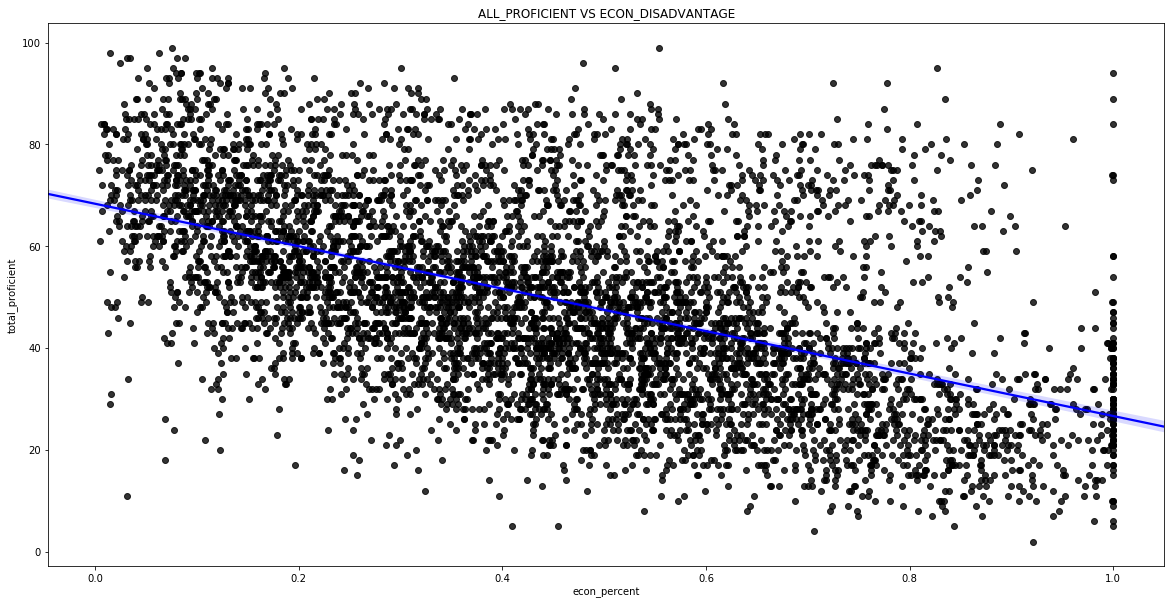

<Figure size 432x288 with 0 Axes>

In [446]:
plt.figure(figsize=(20,10))
plt.title('ALL_PROFICIENT VS ECON_DISADVANTAGE')
sns.regplot(x=df_final.econ_percent, y=df_final.total_proficient, scatter_kws={"color": "black"}, line_kws={"color": "blue"})
plt.show()
plt.clf()

As you can see, there are many scattered data points, but a decreasing regression line is still made clear. This is to be expected; when more of a population is economically disadvantaged, less of that population is considered proficient based on the standardized tests.

Let's dig a little deeper and see if there's any difference between ethnicities.

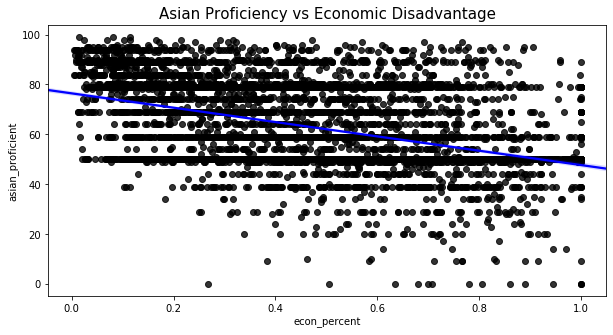

<Figure size 432x288 with 0 Axes>

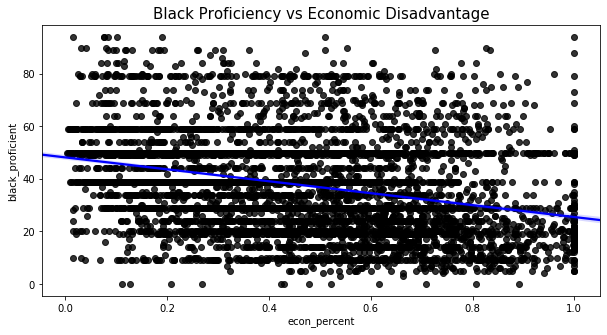

<Figure size 432x288 with 0 Axes>

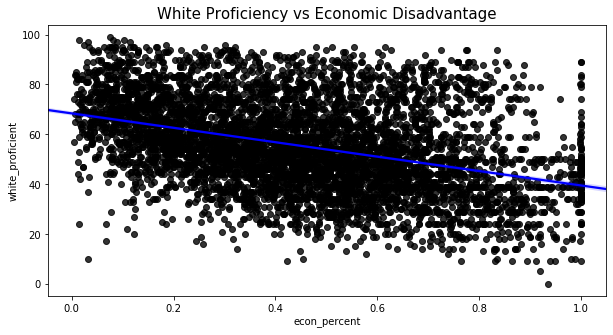

<Figure size 432x288 with 0 Axes>

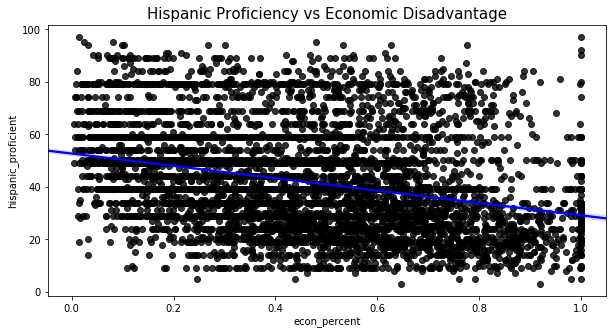

<Figure size 432x288 with 0 Axes>

In [447]:
d = {
    'asian_proficient': 'Asian',
    'black_proficient': 'Black',
    'white_proficient': 'White',
    'hispanic_proficient': 'Hispanic'
}

for k,v in d.items():
    plt.figure(figsize=(10,5))
    plt.title(v + ' Proficiency vs Economic Disadvantage', fontsize=15)
    sns.regplot(data=df_final, x='econ_percent', y=k, scatter_kws={"color": "black"}, line_kws={"color": "blue"})
    plt.show()
    plt.clf()

Though all of these graphs have descending regression lines, you can see that they range from different percentages. We certainly expected every line to be decreasing. We can also determine that students of the Asian and white races tend to have higher proficiency rates than those of the Hispanic and black races.

But this isn't any big news. I'm sure this information could've been guessed; however, we can actually use this information to find out more from just this data.

If you recall from earlier, when we tidied our data, we created a column based off of a formula we used to account for each race's portion of the row's whole sample size. Would this really make a difference in our graphs besides changing the scale of the y-axis? Let's find out!

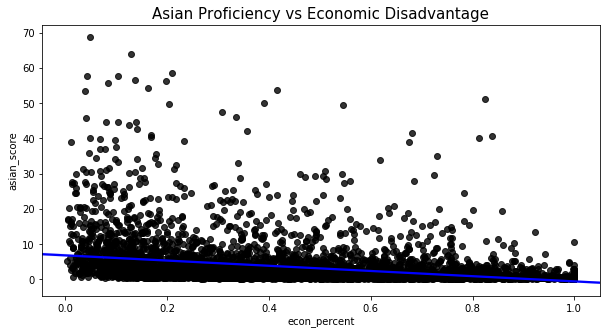

<Figure size 432x288 with 0 Axes>

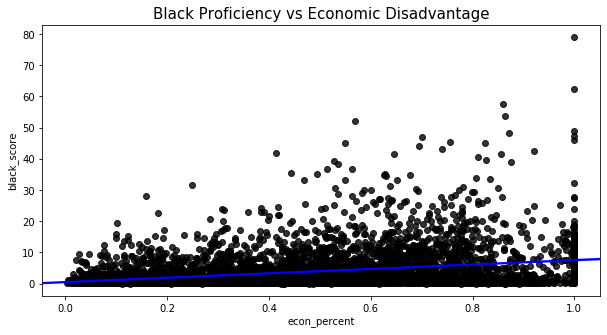

<Figure size 432x288 with 0 Axes>

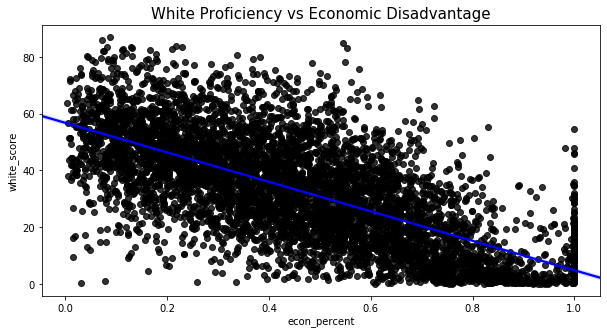

<Figure size 432x288 with 0 Axes>

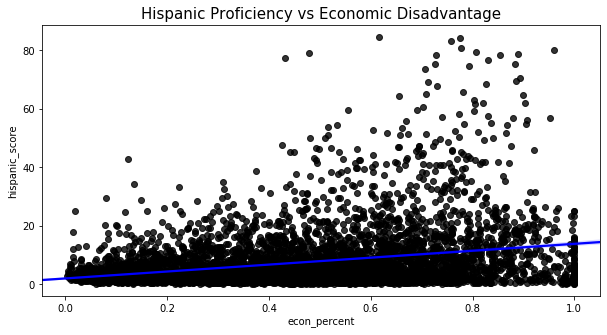

<Figure size 432x288 with 0 Axes>

In [448]:
d = {
    'asian_score': 'Asian',
    'black_score': 'Black',
    'white_score': 'White',
    'hispanic_score': 'Hispanic'
}

for k,v in d.items():
    plt.figure(figsize=(10,5))
    plt.title(v + ' Proficiency vs Economic Disadvantage', fontsize=15)
    sns.regplot(data=df_final, x='econ_percent', y=k, scatter_kws={"color": "black"}, line_kws={"color": "blue"})
    plt.show()
    plt.clf()

Whoa, what happened here? Now we have some increasing regression lines? Is that even legal??

The functions these graphs are based on weigh the number of students of a race as a portion of the given overall student sample size in each row. In other words, a race that makes up a small part of a row's total number of students may potentially have a higher "score" compared to another race that makes up a large majority of the same row's total number of students if the former race has a high proficiency rate and the latter race has a low one.

So, what do these regression lines tell us?  
Well, the two graphs with decreasing regression lines are for students of Asian and white races while the two with increasing regression lines are for students of the Hispanic and black races.  
Decreasing lines mean that there is generally a lower "score" as the percentage of economically disadvantaged students increases. Increasing lines mean that there is generally a higher "score" as this percentage increases.  
Changing from decreasing to increasing can mean one of two things: either students of that race are actually becoming *more* proficient as they are more economically disadvantaged or there are simply *more students of that race* that make up the high economically disadvantaged areas.  
As seen in the previous sets of graphs, we can rule out the former. This data is actually telling us **which races are more likely to attend schools in more economically disadvataged areas than the others**.

Not only that, but steepness of the regression lines also tell us a lot. As you can see, the regression line for the White Proficiency graph has a much, *much* steeper downwards slope than the others (just eyeballing it, it's about -60 while the next steepest is flatter than -10). This shows the wild difference between the high number of students of white ethnicity living in areas of low economic disadvantage and the low number of these students living in areas of high economic disadvantage.

Let's see if we can find anything interesting in a couple of individual states!

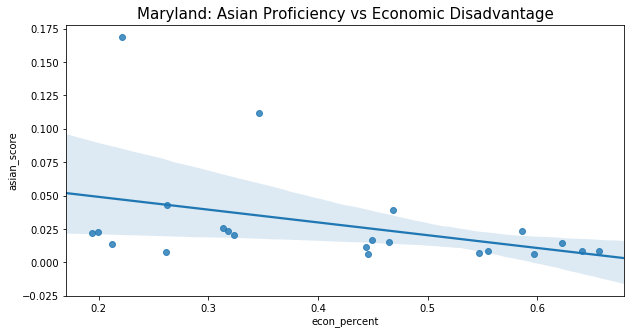

<Figure size 432x288 with 0 Axes>

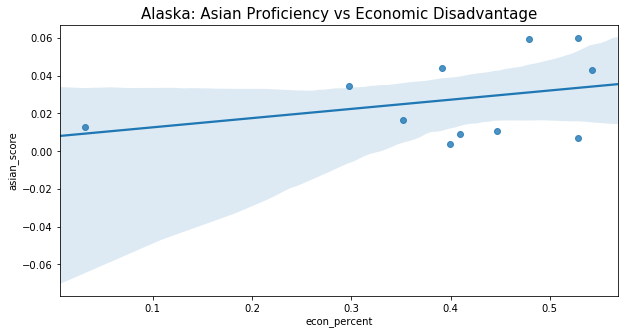

<Figure size 432x288 with 0 Axes>

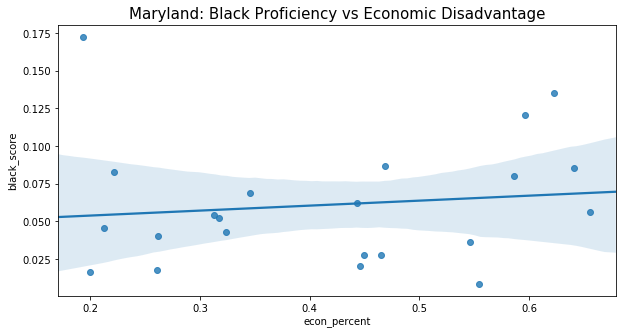

<Figure size 432x288 with 0 Axes>

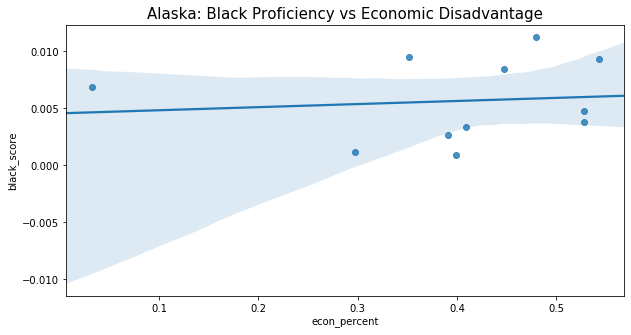

<Figure size 432x288 with 0 Axes>

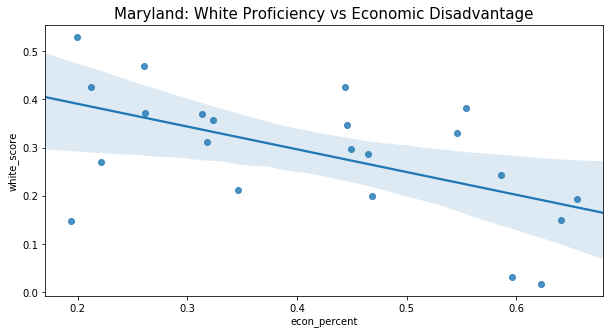

<Figure size 432x288 with 0 Axes>

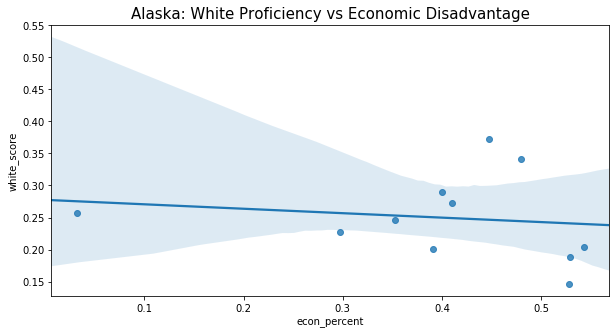

<Figure size 432x288 with 0 Axes>

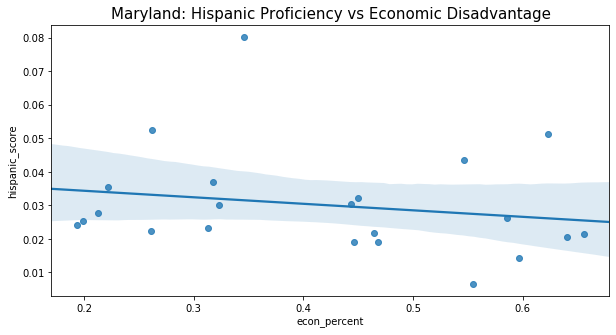

<Figure size 432x288 with 0 Axes>

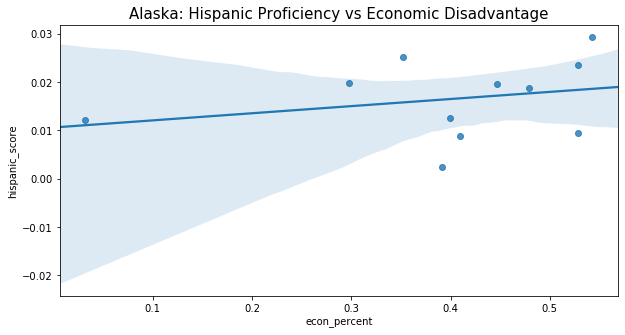

<Figure size 432x288 with 0 Axes>

In [449]:
df_groups = dftemp.groupby('state_name')

d = {
    'asian_score': 'Asian',
    'black_score': 'Black',
    'white_score': 'White',
    'hispanic_score': 'Hispanic'
}

# the level of proficiency in terms of how many are proficient in regards to their peers

for k,v in d.items():
    plt.figure(figsize=(10,5))
    plt.title('Maryland: ' + v + ' Proficiency vs Economic Disadvantage', fontsize=15)
    sns.regplot(data=df_groups.get_group('MARYLAND'), x='econ_percent', y=k)
    plt.show()
    plt.clf()
    
    plt.figure(figsize=(10,5))
    plt.title('Alaska: ' + v + ' Proficiency vs Economic Disadvantage', fontsize=15)
    sns.regplot(data=df_groups.get_group('ALASKA'), x='econ_percent', y=k)
    plt.show()
    plt.clf()

Here, we have graphs for the states of Maryland and Alaska that model proficiency "scores" or each race with respect to the area's percentage of economically disadvantaged students. Maryland was chosen because our school is located in Maryland, and Alaska was chosen because the total number of accounted students there was similar to the number of accounted students for Maryland and because we ourselves have little knowledge of Alaska's demographics in general.

Seeing just Maryland's graphs, they do indeed follow the trends that we found in the previous set of graphs: graphs for Asian and white proficiencies have a descending linear regression while the graph for black proficiency has an increasing linear regression, and the white proficiency regression line is much steeper than the others. The graph for Hispanic proficiency was slightly decreasing, though.

Alaska's graphs differed from the trends we've been seeing. The regression lines for every graph except the one for its white proficiency graph is increasing. None of the regression lines' slopes are significantly steep, but the graph for white proficiency is the only one with a decreasing regression line.  
Something to note is that for the three graphs with increasin regression lines, the scores only range from 0 to at most about 6 while Maryland's graphs have a much larger range for those three races. Considering the small number of data points on the Alaska graphs, this is probably due to a small ratio between races, especially compared to Maryland, where there is a decent amount of diversity.

In [450]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

md = g.get_group('MARYLAND')
ak = g.get_group('ALASKA')

arr = ['asian_score', 'black_score', 'white_score', 'hispanic_score']

mdframe = pd.DataFrame()
akframe = pd.DataFrame()

def pred(m,b,x):
    return (m*x) + b
mdframe = mdframe.assign(econ_score=md.econ_percent)
akframe = akframe.assign(econ_score=ak.econ_percent)
for x in arr:
    string = 'resid_' + x
    xlist,ylist = np.array(md.econ_percent).reshape((-1,1)), np.array(md[x]).reshape((-1,1))
    md_model = LinearRegression().fit(xlist, ylist)
    mdframe[string] = md.apply(lambda e: e[x] - pred(md_model.coef_[0][0], md_model.intercept_[0], e.econ_percent),axis=1)
    
    
    xlist1,ylist1 = np.array(ak.econ_percent).reshape((-1,1)), np.array(ak[x]).reshape((-1,1))
    ak_model = LinearRegression().fit(xlist1, ylist1)
    akframe[string] = ak.apply(lambda e: e[x] - pred(ak_model.coef_[0][0], ak_model.intercept_[0], e.econ_percent),axis=1)
    print('MD ->\tslope: ' + str(md_model.coef_[0][0]) + '  \tintercept: ' + str(md_model.intercept_[0]))
    print('AK ->\tslope: ' + str(ak_model.coef_[0][0]) + '  \tintercept: ' + str(ak_model.intercept_[0]) + '\n')

MD ->	slope: -0.09569261122590152  	intercept: 0.06816920851271294
AK ->	slope: 0.04882574054182606  	intercept: 0.007687104284189183

MD ->	slope: 0.03300140794014839  	intercept: 0.04728427888544749
AK ->	slope: 0.002711159031105708  	intercept: 0.004542233213576545

MD ->	slope: -0.4709913546756944  	intercept: 0.48482299676763974
AK ->	slope: -0.06932504963964425  	intercept: 0.2776140352048951

MD ->	slope: -0.019442473175167157  	intercept: 0.03826419548159933
AK ->	slope: 0.01473599359603568  	intercept: 0.010584640387221362



Our observations for the above graphs are supported by these coefficients and intercepts.

For Maryland, the slopes of the first (Asian) and third (white) and negative while the other two are positive. The slope for white proficiency has a significantly steeper slope and significantly higher intercept as the others.

For Alaska, all graphs except the one for white proficiency have positive slopes. The slope for white proficiency also has the greatest difference between itself and the next steepest slope than the other slopes of Alaska's graphs. The intercept for the white proficiency graph is also significantly higher than the others.

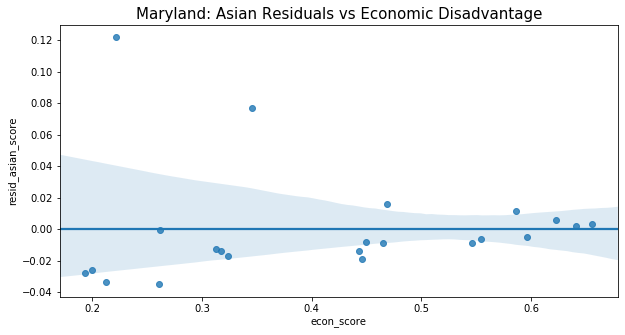

<Figure size 432x288 with 0 Axes>

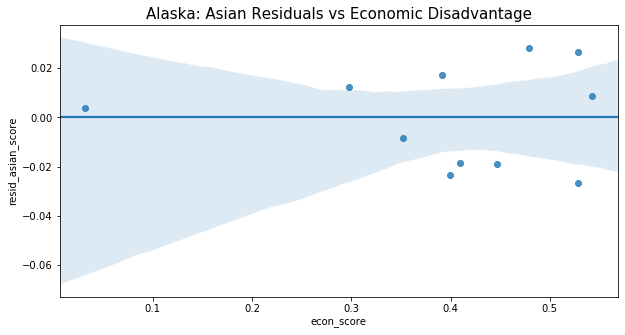

<Figure size 432x288 with 0 Axes>

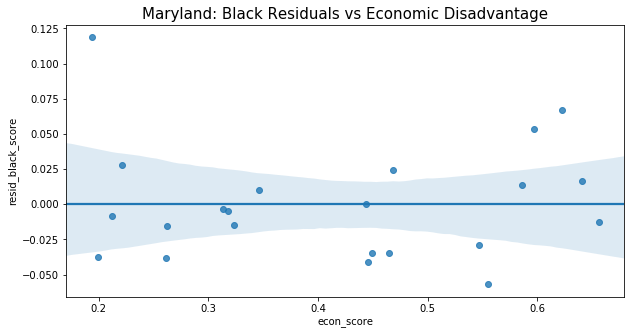

<Figure size 432x288 with 0 Axes>

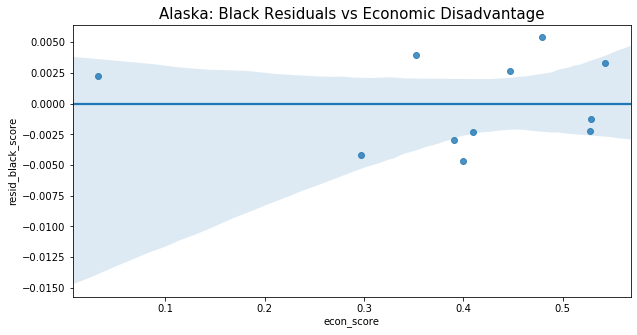

<Figure size 432x288 with 0 Axes>

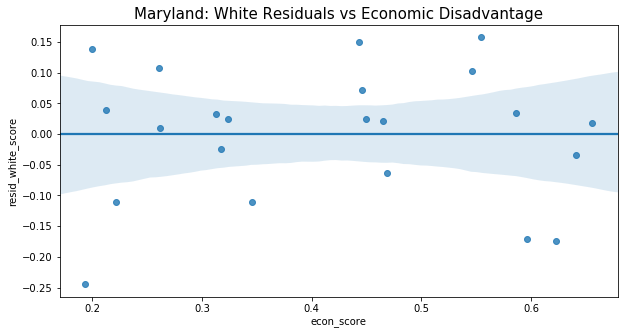

<Figure size 432x288 with 0 Axes>

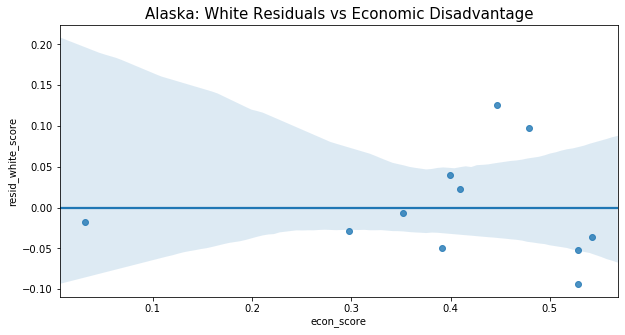

<Figure size 432x288 with 0 Axes>

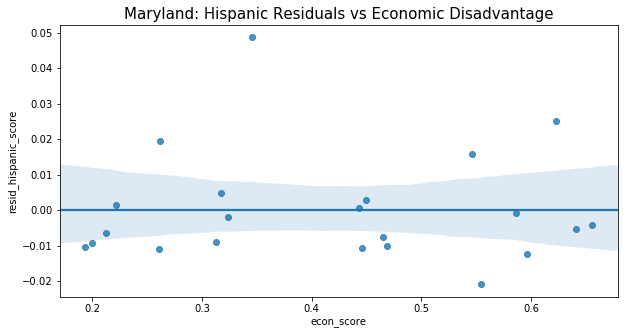

<Figure size 432x288 with 0 Axes>

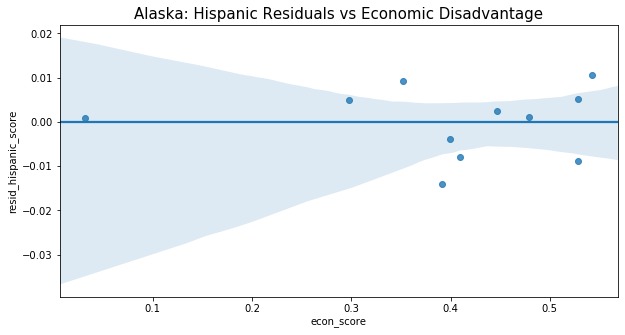

<Figure size 432x288 with 0 Axes>

In [451]:
d = {
    'resid_asian_score': 'Asian',
    'resid_black_score': 'Black',
    'resid_white_score': 'White',
    'resid_hispanic_score': 'Hispanic'
}

for k,v in d.items():
    plt.figure(figsize=(10,5))
    plt.title('Maryland: ' + v + ' Residuals vs Economic Disadvantage', fontsize=15)
    sns.regplot(data=mdframe, x='econ_score', y=k)
    plt.show()
    plt.clf()
    
    plt.figure(figsize=(10,5))
    plt.title('Alaska: ' + v + ' Residuals vs Economic Disadvantage', fontsize=15)
    sns.regplot(data=akframe, x='econ_score', y=k)
    plt.show()
    plt.clf()

Finally, the above graphs show the residuals of the Maryland and Alaska graphs. These show us the difference between the data points and the regression line at their corresponding x-value.

Looking at the residual scores, they are mostly low (all points are within 0±15, vast majority of points are within 0±3 with the exception of white students), meaning that the data points mostly followed the regression line. The residual graphs for students of white ethnicity are rather scattered, probably due to such a high portion of the students being of this ethnicity. Otherwise, there are some outliars, but not too many.

## Conclusion & Insight

The purpose of this tutorial was to show the relationship between the percentage of economically disadvantaged students in an area and these students' proficiency rates by race as well as the meaning of this data. From this tutorial, we confirmed that there is indeed an inverse correlation between the two for all races. We were also able to model the populations of each student's race based on the percentage of economically disadvantaged students in relative terms based on standardized test score data.

Further research on this matter could attempt to find a direct correlation by eliminating peripheral factors.  
Also, if focusing on economic status, more categories could be added to create more distinct sections rather than just a binary distinction (is or is not economically disadvantaged).

## Additional Resources

- https://www.americanprogress.org/issues/race/news/2013/09/24/75320/why-economic-disadvantage-becomes-educational-disadvantage/
    - low percentages of low socioeconomic status in top universities
    - high percentages of high socioeconomic status in top universities
- https://equitablegrowth.org/economic-disadvantage-education-inequality/
    - relationship between income inequality & education
- https://shsu-ir.tdl.org/bitstream/handle/20.500.11875/55/MCGOWN-DISSERTATION-2016.pdf?sequence=1&isAllowed=y
    - academic performance differs based on wealth, race, & gender